In [5]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
#ignore warnings
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import Birch
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import OPTICS
from sklearn.mixture import GaussianMixture


#random seed
np.random.seed(4324)

#### ładowanie danych już po feature engineeringu

In [6]:
#load different datasets
df1 = pd.read_csv('../Data/no_standarization.csv')
df2 = pd.read_csv('../Data/raw_normalized_scaled.csv')
df3 = pd.read_csv('../Data/log_normalized.csv')
df4 = pd.read_csv('../Data/log_scaled.csv')
df4_og = df4.copy()
df5 = pd.read_csv('../Data/removed_columns_no_standarization.csv')


In [2]:
pip install minisom

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for minisom: filename=MiniSom-2.3.2-py3-none-any.whl size=10650 sha256=cc1feb9737bbfef1ce21ad5561afda4e6a16769212073ff10568b816c937de3f
  Stored in directory: c:\users\zosia\appdata\local\pip\cache\wheels\59\45\f9\fde478e891bbfd6b7ad358101f2ff02d48e2227808bafef22c
Successfully built minisom


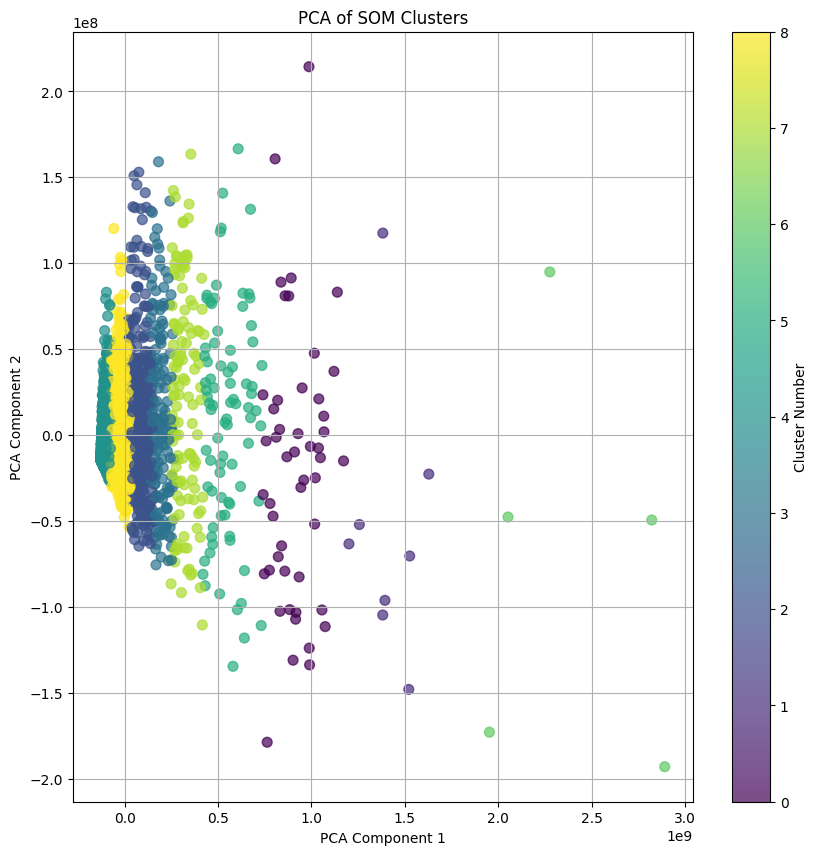

Silhouette Score: 0.46957389043827974
Calinski-Harabasz Score: 7490.144547185338
Davies-Bouldin Score: 0.8508548720260575


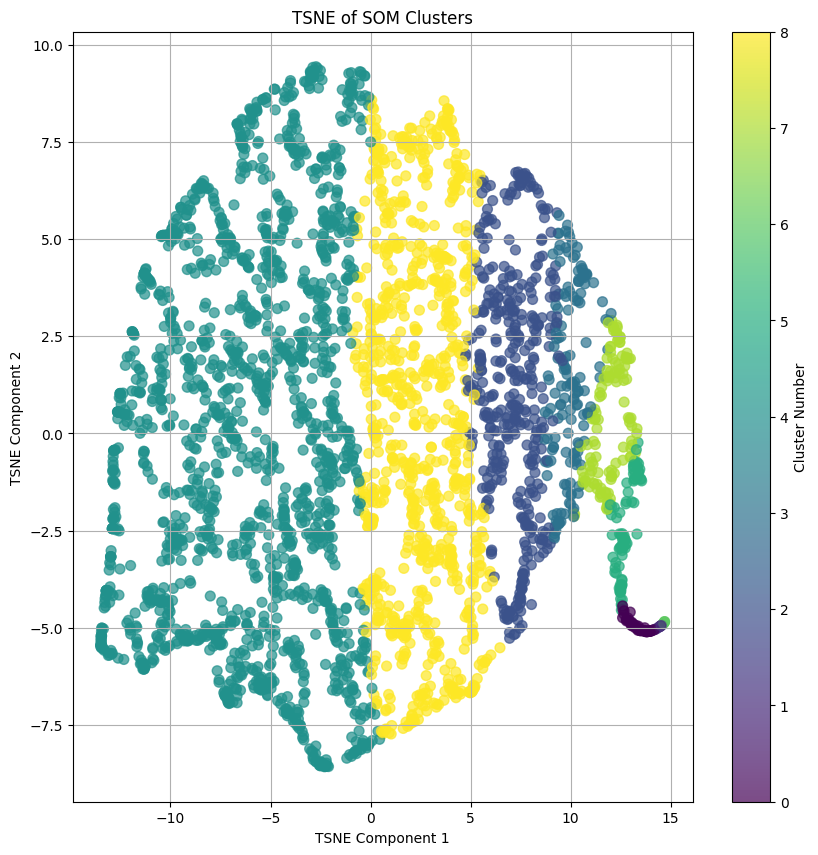

In [46]:
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#set random seed
np.random.seed(4324)



# Step 1: Create some example data
data_array = df1.to_numpy() # 100 samples, each with 3 features


# Step 2: Initialize the SOM
som_width = 3
som_height = 3
input_len = data_array.shape[1]
sigma = 0.1
learning_rate = 0.5

som = MiniSom(som_height, som_width, input_len, sigma=sigma, learning_rate=learning_rate)

# Initialize the weights
som.random_weights_init(data_array)

# Train the SOM
num_iterations = 10000
som.train_random(data_array, num_iterations)

# Step 3: Assign cluster numbers based on the BMUs
# Get the coordinates of the winning neurons (BMUs) for each input sample
winners = np.array([som.winner(x) for x in data_array])

# Assign a unique cluster number to each BMU
# Flatten the grid coordinates to a single cluster number
cluster_numbers = np.ravel_multi_index((winners[:, 0], winners[:, 1]), dims=(som_height, som_width))

# Step 4: Perform PCA for dimensionality reduction
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_array)

# Step 5: Visualize the clusters in a 2D scatter plot using the PCA results
plt.figure(figsize=(10, 10))
scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_numbers, cmap='viridis', s=50, alpha=0.7)
plt.title('PCA of SOM Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster Number')
plt.grid()
plt.show()


# Step 6: Calculate and print the clustering scores
sil_score = silhouette_score(data_array, cluster_numbers)
calinski_score = calinski_harabasz_score(data_array, cluster_numbers)
davies_score = davies_bouldin_score(data_array, cluster_numbers)

print(f'Silhouette Score: {sil_score}')
print(f'Calinski-Harabasz Score: {calinski_score}')
print(f'Davies-Bouldin Score: {davies_score}')

# Plot the results using TSNE
from sklearn.manifold import TSNE

# Perform TSNE on the PCA results
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
data_tsne = tsne.fit_transform(data_array)

# Visualize the clusters in a 2D scatter plot using the TSNE results
plt.figure(figsize=(10, 10))
scatter = plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=cluster_numbers, cmap='viridis', s=50, alpha=0.7)
plt.title('TSNE of SOM Clusters')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.colorbar(scatter, label='Cluster Number')
plt.grid()
plt.show()


In [24]:
from itertools import product
from minisom import MiniSom
from sklearn.metrics import silhouette_score

def optimize_som_hyperparameters(data, som_width_range, som_height_range, sigma_range, learning_rate_range, num_iterations):
    best_score = float('-inf')
    best_params = {}

    for width, height, sigma, learning_rate in product(som_width_range, som_height_range, sigma_range, learning_rate_range):
        som = MiniSom(width, height, data.shape[1], sigma=sigma, learning_rate=learning_rate)
        som.random_weights_init(data)
        som.train_random(data, num_iterations)

        winners = np.array([som.winner(x) for x in data])
        cluster_numbers = np.ravel_multi_index((winners[:, 0], winners[:, 1]), dims=(width, height))
        score = silhouette_score(data, cluster_numbers)

        if score > best_score:
            best_score = score
            best_params = {
                'width': width,
                'height': height,
                'sigma': sigma,
                'learning_rate': learning_rate
            }

    return best_params, best_score


In [41]:

# Define ranges for hyperparameters
som_width_range = [2, 3, 4]  # Example range for SOM width
som_height_range = [2, 3]  # Example range for SOM height
sigma_range = [0.1, 0.5, 1.0]  # Example range for sigma
learning_rate_range = [0.1, 0.5, 1.0]  # Example range for learning rate
num_iterations = 10000  # Number of training iterations

# Call the function to optimize hyperparameters
best_params, best_score = optimize_som_hyperparameters(data_array, som_width_range, som_height_range, sigma_range, learning_rate_range, num_iterations)

print("Best Hyperparameters:")
print(best_params)
print("Best Silhouette Score:", best_score)

Best Hyperparameters:
{'width': 2, 'height': 2, 'sigma': 0.1, 'learning_rate': 0.5}
Best Silhouette Score: 0.690478953433193


In [4]:
df1.head()

runtime_minutes  director_name  movie_averageRating  movie_numerOfVotes  \
0            116.0          503.0                  6.3              5077.0   
1            114.0          299.0                  6.2             22262.0   
2            124.0           75.0                  7.1            145614.0   
3            125.0          350.0                  7.0            110757.0   
4             98.0          568.0                  6.1             41748.0   

   approval_Index  production_year     month_sin     month_cos  \
0        3.823171             1996  1.000000e-10  1.000000e-10   
1        4.434679             1993  8.660254e-01  5.000000e-01   
2        6.078636             2011  1.000000e-10  1.000000e+00   
3        5.850243             1977  1.000000e-10  1.000000e-10   
4        4.643223             2000  5.000000e-01  8.660254e-01   

   number_of_professions  age  ...  Musical  Mystery  News  Romance  Sci-Fi  \
0                      3    2  ...        0        0     0        0       0   
1                      3    1  ...        0        1     0        1       0   
2                      3    1  ...        0        0     0        0       0   
3                      3    2  ...        0        0     0        0       0   
4                      2    2  ...        0        0     0        0       0   

   Sport  Thriller  War  Western  cluster  
0      0         0    0        0        0  
1      0         0    0        0        3  
2      0         0    0        0        3  
3      0         1    0        0        3  
4      0         0    0        0        0  

[5 rows x 37 columns]

### przypomnienie łokci

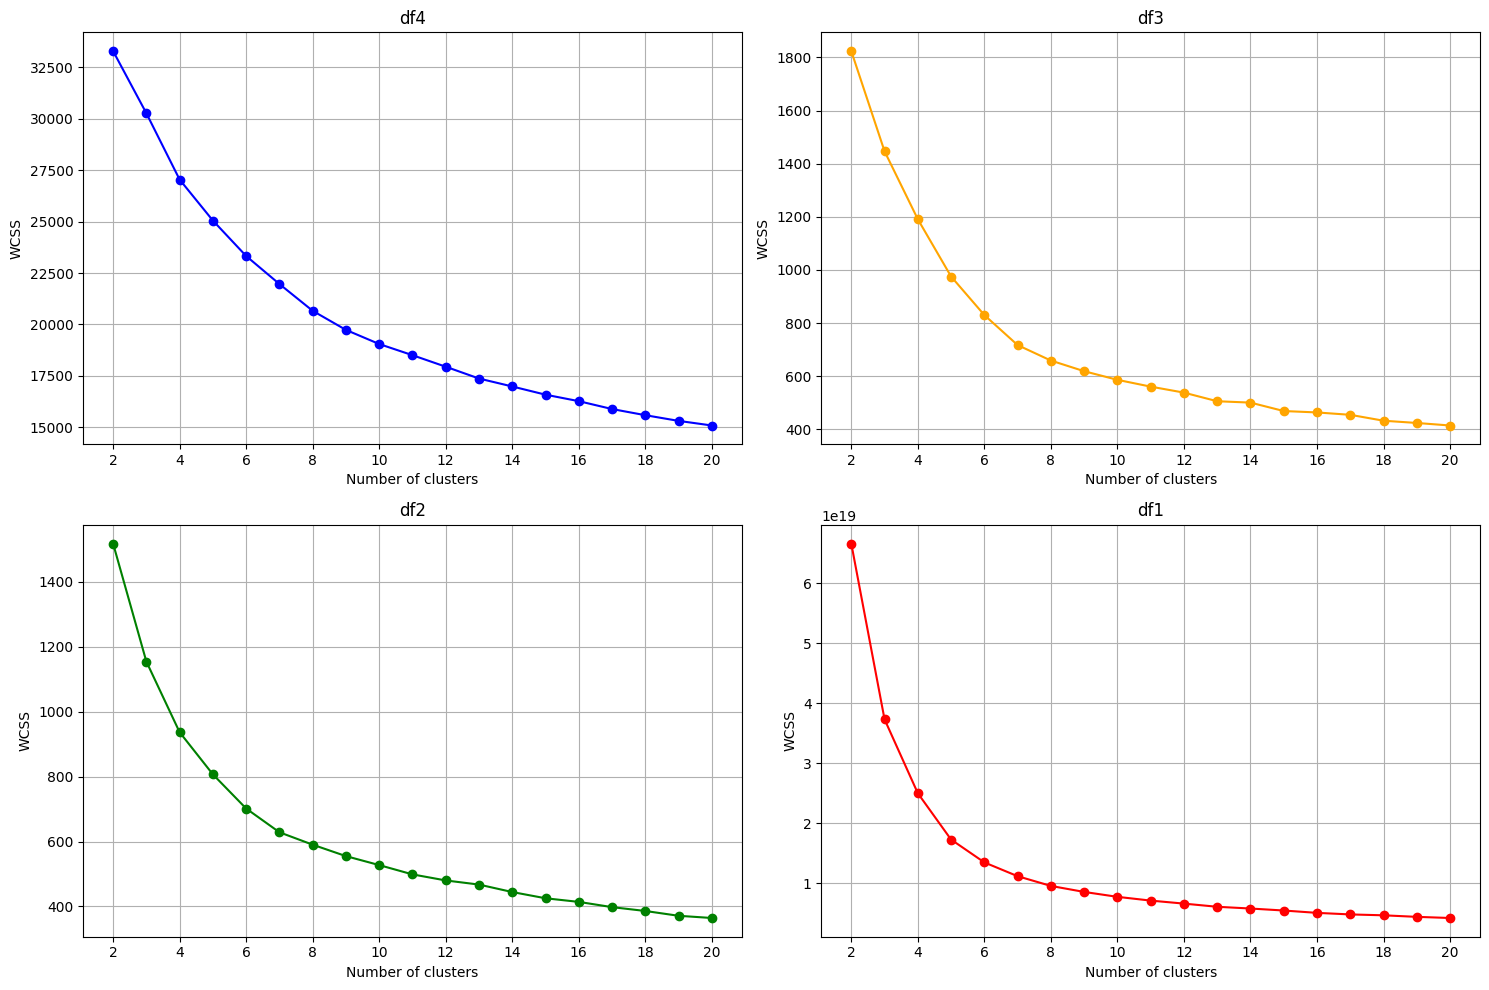

In [5]:

def calculate_wcss(data):
    wcss = []
    for n in range(2, 21):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)
    return wcss

# Assuming v1, v2, v3, and v4 are your datasets
wcss_df4 = calculate_wcss(df4)
wcss_df3 = calculate_wcss(df3)
wcss_df2 = calculate_wcss(df2)
wcss_df1 = calculate_wcss(df1)


# Assuming wcss_v1, wcss_v2, wcss_v3, and wcss_v4 are defined lists
wcss_list = [wcss_df4, wcss_df3, wcss_df2, wcss_df1]
titles = ['df4', 'df3', 'df2', 'df1']
colors = ['b', 'orange', 'green', 'r']

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, (wcss, title, color) in enumerate(zip(wcss_list, titles, colors)):
    row = i // 2
    col = i % 2
    axs[row, col].plot(range(2, 21), wcss, marker='o', color=color)
    axs[row, col].set_title(title)
    axs[row, col].set_xlabel('Number of clusters')
    axs[row, col].set_ylabel('WCSS')
    axs[row, col].set_xticks(range(2, 22, 2))  # Set x-ticks every 2 units
    axs[row, col].grid()

plt.tight_layout()
plt.show()



optymalnie z łokcia myślę 7 klastrów

### Modelowanie (na razie zrobione dla 7 klastrów (w metodach w których podaje się liczbe klastrów i tylko na ramce z nieprzeskalowanymi danymi, żeby sprawdzić analogicznie reszte wariantów opisałam na dole))

In [18]:
# wypróbuj różne metoday klasteryzacji dla N klastrów
def perform_clustering1(df4, N, df4_results,eps):
    # KMeans
    # how does KMeans work
    # 1. Randomly initialize the centroids
    # 2. Assign each data point to the closest centroid
    # 3. Recompute the centroids
    # 4. Repeat steps 2 and 3 until convergence

    kmeans = KMeans(n_clusters=N)
    kmeans.fit(df4)
    df4_results['kmeans'] = kmeans.labels_

    # AgglomerativeClustering
    # how does AgglomerativeClustering work
    # 1. Start with n clusters, each data point is a cluster
    # 2. Merge the two closest clusters
    # 3. Repeat step 2 until only a single cluster remains

    agglomerative = AgglomerativeClustering(n_clusters=N)
    agglomerative.fit(df4)
    df4_results['agglomerative'] = agglomerative.labels_

    # DBSCAN
    # how does DBSCAN work
    # 1. Randomly initialize a point
    # 2. Find all points within the eps distance from the point
    # 3. If there are more than min_samples points within eps distance, create a cluster
    # 4. Repeat steps 2 and 3 until all points are visited
    # find best eps and min_samples
    # eps - maximum distance between two samples for one to be considered as in the neighborhood of the other
    # min_samples - number of samples in a neighborhood for a point to be considered as a core point

    # function fo finding best eps and min_samples
    def find_best_eps_min_samples(data):
        from sklearn.neighbors import NearestNeighbors
        neigh = NearestNeighbors(n_neighbors=2)
        neigh.fit(data)
        distances, indices = neigh.kneighbors(data)
        distances = np.sort(distances, axis=0)
        distances = distances[:, 1]
        plt.plot(distances)
        plt.axhline(y=2, color='r', linestyle='--')
        plt.title('Distances for DBSCAN')
        plt.show()

    find_best_eps_min_samples(df4)
    #what does the plot show
    # the plot shows the distances between each point and its closest neighbor
    # the point where the plot starts to grow rapidly is the best eps value


    dbscan = DBSCAN(eps=eps, min_samples=6) # dla innych danych trzeba zmienić eps i min_samples DB4 eps=2, min_samples=6, DB3 eps=0.3
    dbscan.fit(df4)
    df4_results['dbscan'] = dbscan.labels_

    # Birch
    # how is Birch different from KMeans
    # 1. Birch builds a tree structure to represent the data
    # 2. Birch does not require the number of clusters to be specified
    # 3. Birch does not require the data to be stored in memory
    # 4. Birch is faster than KMeans
    # ale generalnie Birch działa na podobnej zasadzie co KMeans

    birch = Birch(n_clusters=N)
    birch.fit(df4)
    df4_results['birch'] = birch.labels_

    # MiniBatchKMeans
    # how does MiniBatchKMeans work
    # MiniBatchKMeans uses mini-batches of data to update the centroids (other than that works like KMeans)

    mini_batch_kmeans = MiniBatchKMeans(n_clusters=N)
    mini_batch_kmeans.fit(df4)
    df4_results['mini_batch_kmeans'] = mini_batch_kmeans.labels_



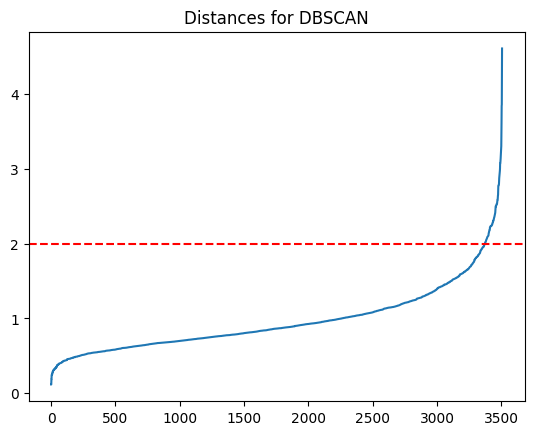

In [7]:
df4_results = pd.DataFrame()
perform_clustering1(df4, 7, df4_results,2)

z tego wykresu widać że najselnsowniej wybrać koło 2 pewnie jako eps, bo tam zaczyna rosnąć najbardziej

In [8]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
df4_tsne = tsne.fit_transform(df4)
df3_tsne = tsne.fit_transform(df3)
df2_tsne = tsne.fit_transform(df2)
df1_tsne = tsne.fit_transform(df1)
df5_tsne = tsne.fit_transform(df5)

# use standard scaler for PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df4_s = scaler.fit_transform(df4)
df3_s = scaler.fit_transform(df3)
df2_s = scaler.fit_transform(df2)
df1_s = scaler.fit_transform(df1)
df5_s = scaler.fit_transform(df5)

pca = PCA(n_components=2)
df4_pca = pca.fit_transform(df4_s)
df3_pca = pca.fit_transform(df3_s)
df2_pca = pca.fit_transform(df2_s)
df1_pca = pca.fit_transform(df1_s)
df5_pca = pca.fit_transform(df5_s)


pca = PCA(n_components=3)
df4_pca2 = pca.fit_transform(df4_s)
df3_pca2 = pca.fit_transform(df3_s)
df2_pca2 = pca.fit_transform(df2_s)
df1_pca2 = pca.fit_transform(df1_s)
df5_pca2 = pca.fit_transform(df5_s)


In [9]:
def plot_clusters(df4, df4_pca, df4_pca2, df4_tsne): # Plotujemy 5 ostatnich kolumn
    # Plot the results using TSNE
    fig, axs = plt.subplots(5, 2, figsize=(15, 15))

    for i, (col, ax) in enumerate(zip(df4.columns[-10:], axs.flatten())):
        ax.scatter(df4_tsne[:, 0], df4_tsne[:, 1], c=df4[col], cmap='tab10')
        ax.set_title(col)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

    # Plot the results using PCA
    fig, axs = plt.subplots(5, 2, figsize=(15, 15))

    for i, (col, ax) in enumerate(zip(df4.columns[-10:], axs.flatten())):
        ax.scatter(df4_pca[:, 0], df4_pca[:, 1], c=df4[col], cmap='tab10')
        ax.set_title(col)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

    # Plot the results using PCA2 in 3d using plotly express
    import plotly.express as px
    import plotly.io as pio
    pio.renderers.default = 'browser'
    
    for i, col in enumerate(df4.columns[-10:]):
        fig = px.scatter_3d(x=df4_pca2[:, 0], y=df4_pca2[:, 1], z=df4_pca2[:, 2], color=df4[col])
        fig.show()


In [10]:
def perform_clustering2(df4, N, df4_results):
    # MeanShift
    # how does MeanShift work
    # 1. Randomly initialize the centroids
    # 2. Find the points within the bandwidth distance from the centroid
    # 3. Recompute the centroid as the mean of the points within the bandwidth distance
    # 4. Repeat steps 2 and 3 until convergence

    # what is bandwidth
    # bandwidth is the distance within which the points are considered to be close to each other
    # points outside the bandwidth distance are considered to be outliers

    # how is it different from KMeans
    # 1. MeanShift does not require the number of clusters to be specified
    # 2. MeanShift does not require the data to be stored in memory
    # 3. MeanShift is slower than KMeans

    mean_shift = MeanShift()
    mean_shift.fit(df4)
    df4_results['mean_shift'] = mean_shift.labels_

    # SpectralClustering
    # how does SpectralClustering work
    # 1. Construct a similarity matrix
    # 2. Compute the Laplacian matrix
    # 3. Compute the eigenvectors of the Laplacian matrix
    # 4. Use the eigenvectors to cluster the data

    spectral_clustering = SpectralClustering(n_clusters=N)
    spectral_clustering.fit(df4)
    df4_results['spectral_clustering'] = spectral_clustering.labels_

    # AffinityPropagation
    # how does AffinityPropagation work
    # 1. Compute the similarity matrix
    # 2. Compute the availability matrix
    # 3. Compute the responsibility matrix
    # 4. Compute the cluster centers
    # 5. Assign each data point to the closest cluster center

    affinity_propagation = AffinityPropagation()
    affinity_propagation.fit(df4)
    df4_results['affinity_propagation'] = affinity_propagation.labels_

    # OPTICS
    # how does OPTICS work
    # 1. Construct a reachability graph
    # 2. Compute the ordering of the points
    # 3. Extract the clusters from the ordering

    optics = OPTICS(min_samples=5)
    optics.fit(df4)
    df4_results['optics'] = optics.labels_

    # GaussianMixture
    # how does GaussianMixture work
    # 1. Initialize the parameters of the Gaussian distribution
    # 2. Compute the probability of each data point belonging to each cluster
    # 3. Update the parameters of the Gaussian distribution
    # 4. Repeat steps 2 and 3 until convergence
    
    gaussian_mixture = GaussianMixture(n_components=3)
    gaussian_mixture.fit(df4)
    df4_results['gaussian_mixture'] = gaussian_mixture.predict(df4)

In [11]:
perform_clustering2(df4, 7, df4_results)

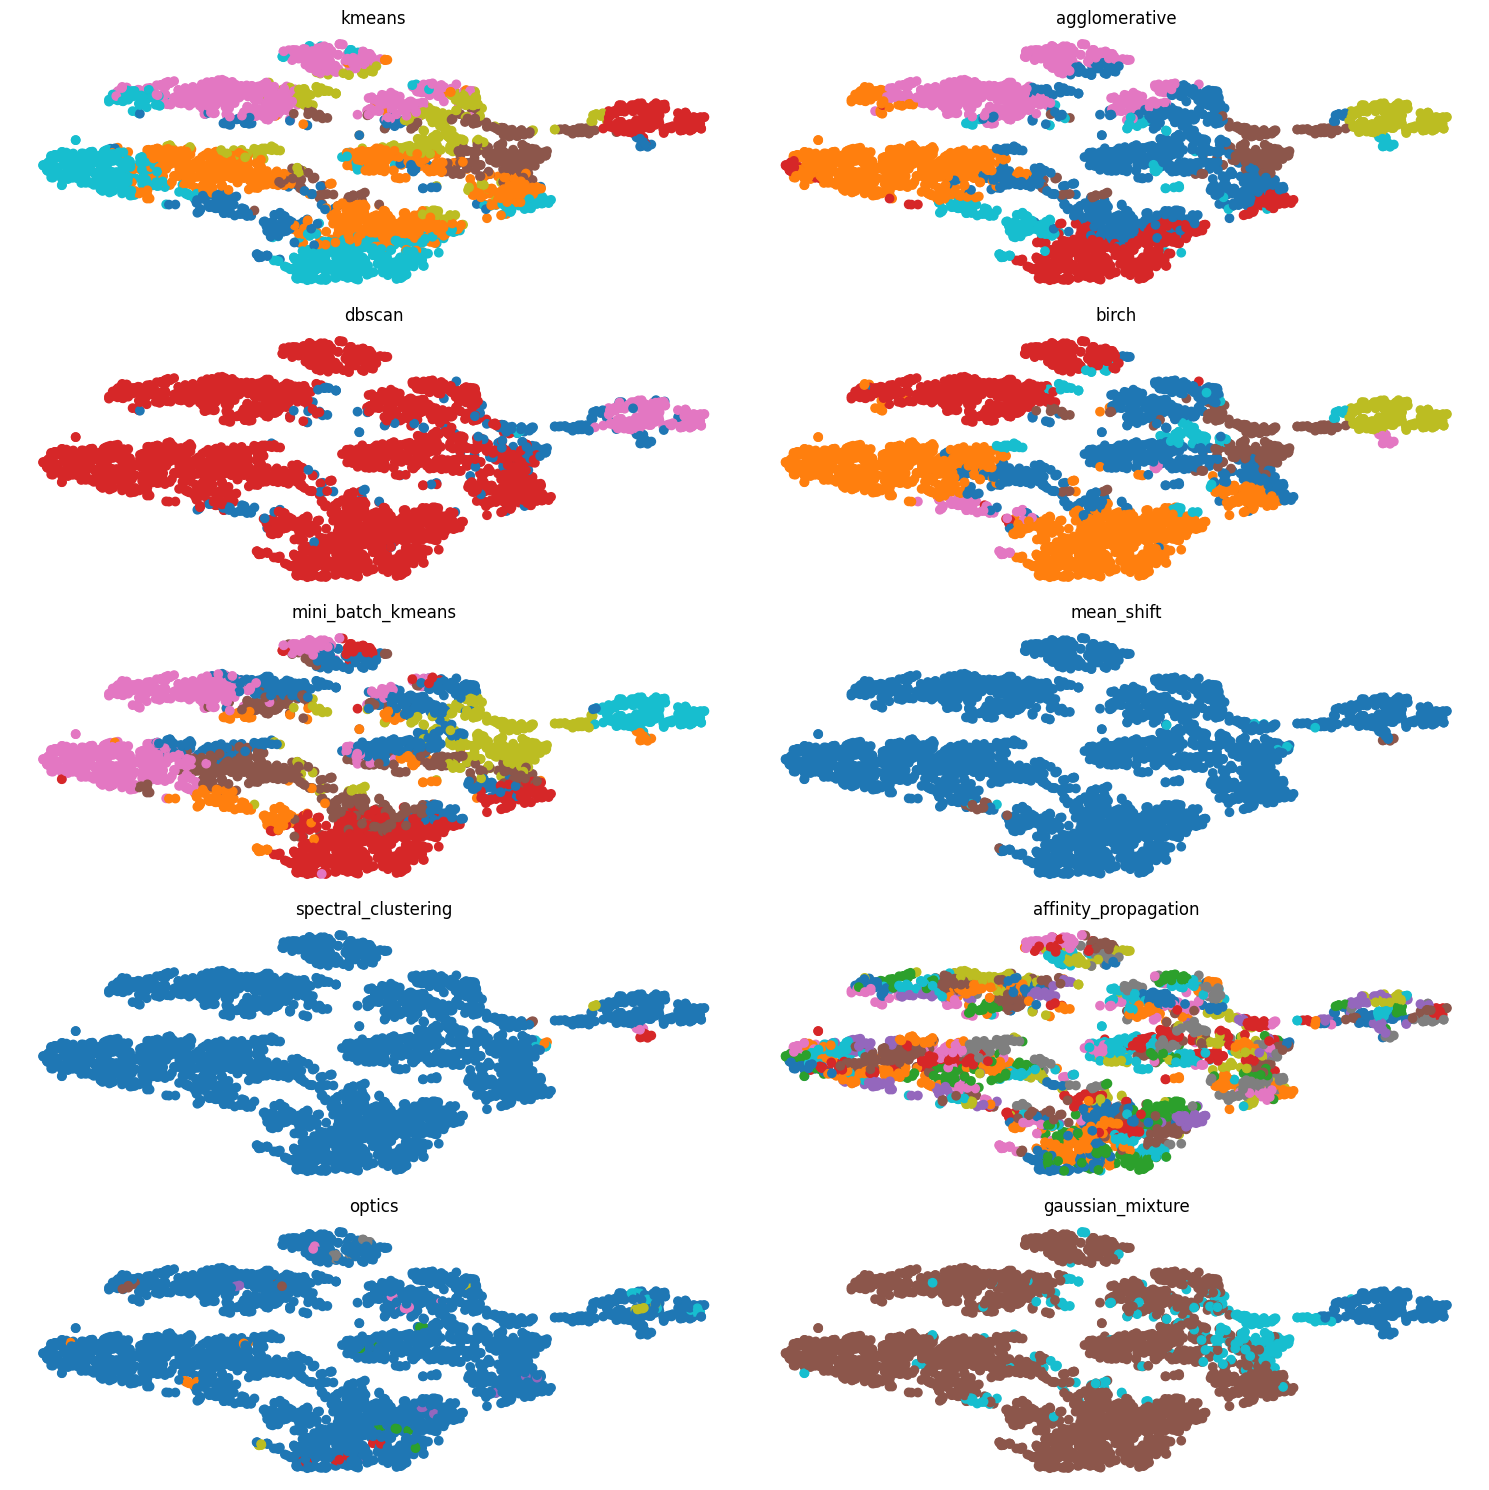

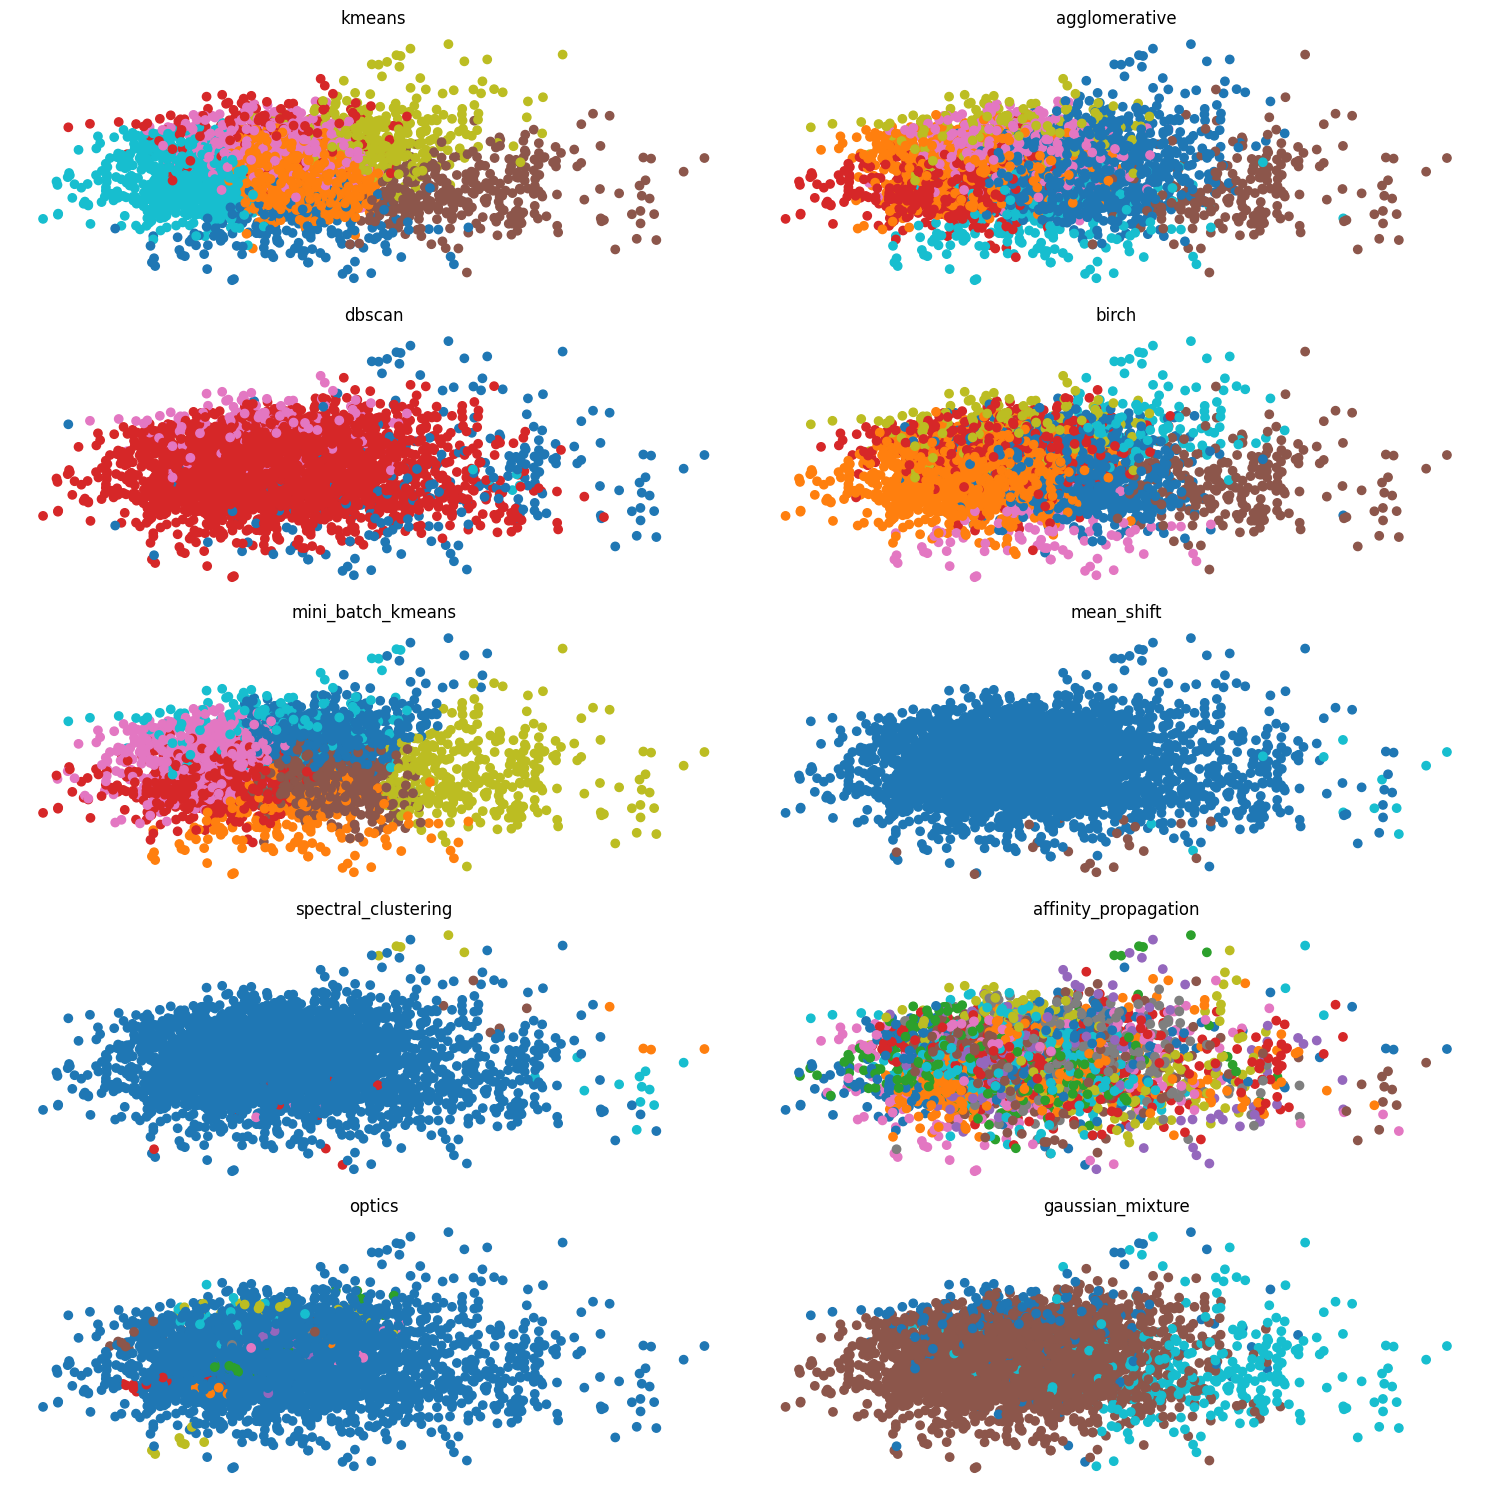

In [12]:
plot_clusters(df4_results, df4_pca, df4_pca2, df4_tsne)

niżej ożna dodać jakies metryki jeszcze jak są

In [13]:
# create a table analysing the results using silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score

def calculate_scores(df4_results):
    scores = pd.DataFrame(index=df4_results.columns, columns=['silhouette_score', 'calinski_harabasz_score', 'davies_bouldin_score'])
    for col in df4_results.columns:
        scores.loc[col, 'silhouette_score'] = silhouette_score(df4, df4_results[col])
        scores.loc[col, 'calinski_harabasz_score'] = calinski_harabasz_score(df4, df4_results[col])
        scores.loc[col, 'davies_bouldin_score'] = davies_bouldin_score(df4, df4_results[col])
        #scores.loc[col, 'adjusted_rand_score'] = adjusted_rand_score(df4['kmeans'], df4_results[col])
    return scores

In [14]:
scores = calculate_scores(df4_results)
print(scores)

                     silhouette_score calinski_harabasz_score  \
kmeans                       0.157173              533.793035   
agglomerative                0.119197              439.370465   
dbscan                       0.227346               218.00668   
birch                        0.140588              422.930777   
mini_batch_kmeans            0.142379              518.469307   
mean_shift                   0.371101                 54.2612   
spectral_clustering          0.292428               31.672814   
affinity_propagation         0.127554              101.217509   
optics                      -0.463267                6.111976   
gaussian_mixture             0.265906              415.495209   

                     davies_bouldin_score  
kmeans                           1.668952  
agglomerative                    1.741751  
dbscan                           1.752422  
birch                             1.70906  
mini_batch_kmeans                1.772041  
mean_shift          

In [15]:
# plot the results
def plot_scores(scores):
    fig, axs = plt.subplots(1, 3, figsize=(15, 10))

    for i, (score, ax) in enumerate(zip(scores.columns, axs.flatten())):
        ax.bar(scores.index, scores[score])
        ax.set_title(score)
        ax.set_xticklabels(scores.index, rotation=45)
        ax.grid()
    plt.tight_layout()
    plt.show()

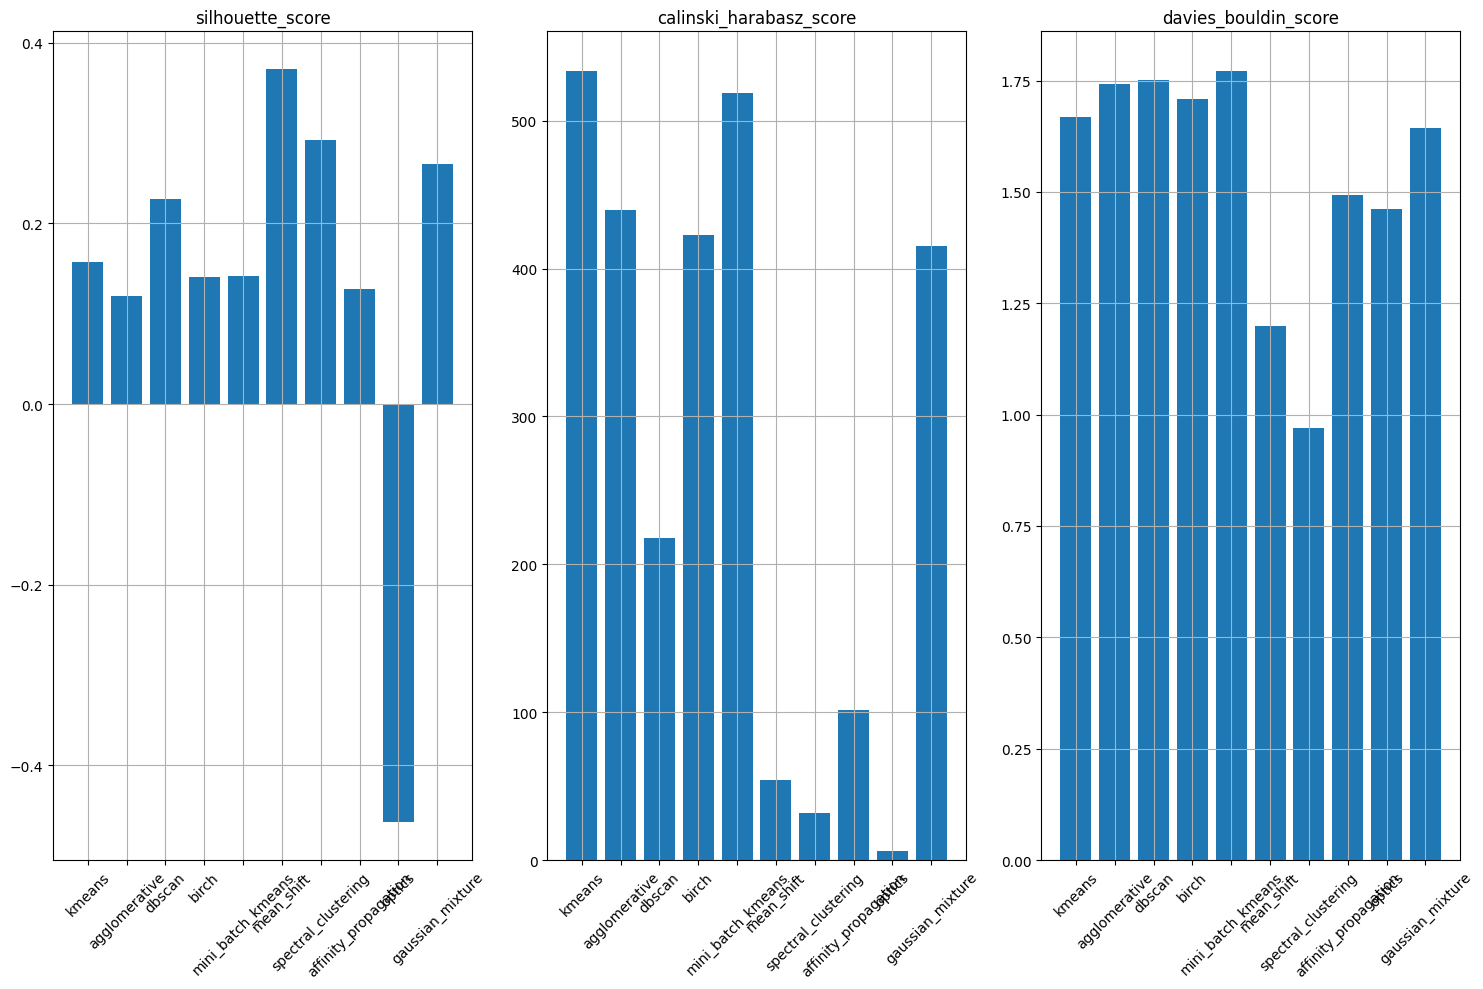

In [16]:
scores = calculate_scores(df4_results)
plot_scores(scores)

jeśli zostawimy tyle modeli to może wypadałoby coś o nich się więcej dowiedzieć jak działają, komentarze do działania są przez copilot napisane, o metrykach sprawdzania też

tą funkcję z rekomendacją możaby chyba wrzucić, tak na koniec jako właśnie zastosowanie biznesowe żeby powtórzyć, używając już klasteringu tego najlepszego

dopisałabym funkcje która jakoś na podstawie tych indywidualnych scorów liczy który mode jest najlepszy (wziąć pod uwagę który score powinien być jak najmniejszy, który jak największy itd.)

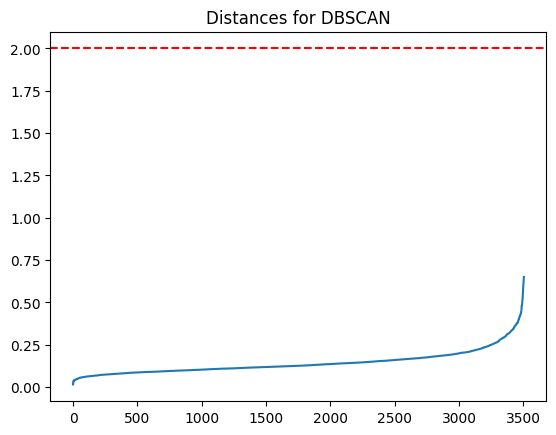

                     silhouette_score calinski_harabasz_score  \
kmeans                       0.127259              313.645802   
agglomerative                 0.12412              307.788083   
dbscan                      -0.029183               97.571531   
birch                         0.11156              250.896305   
mini_batch_kmeans            0.110687              306.687875   
mean_shift                    0.28126              365.720889   
spectral_clustering          0.121649              305.420115   
affinity_propagation         0.059107               100.05376   
optics                      -0.448548                7.401051   
gaussian_mixture             0.105528              273.772376   

                     davies_bouldin_score  
kmeans                           2.310678  
agglomerative                    2.351117  
dbscan                            2.88316  
birch                            2.375047  
mini_batch_kmeans                2.328645  
mean_shift          

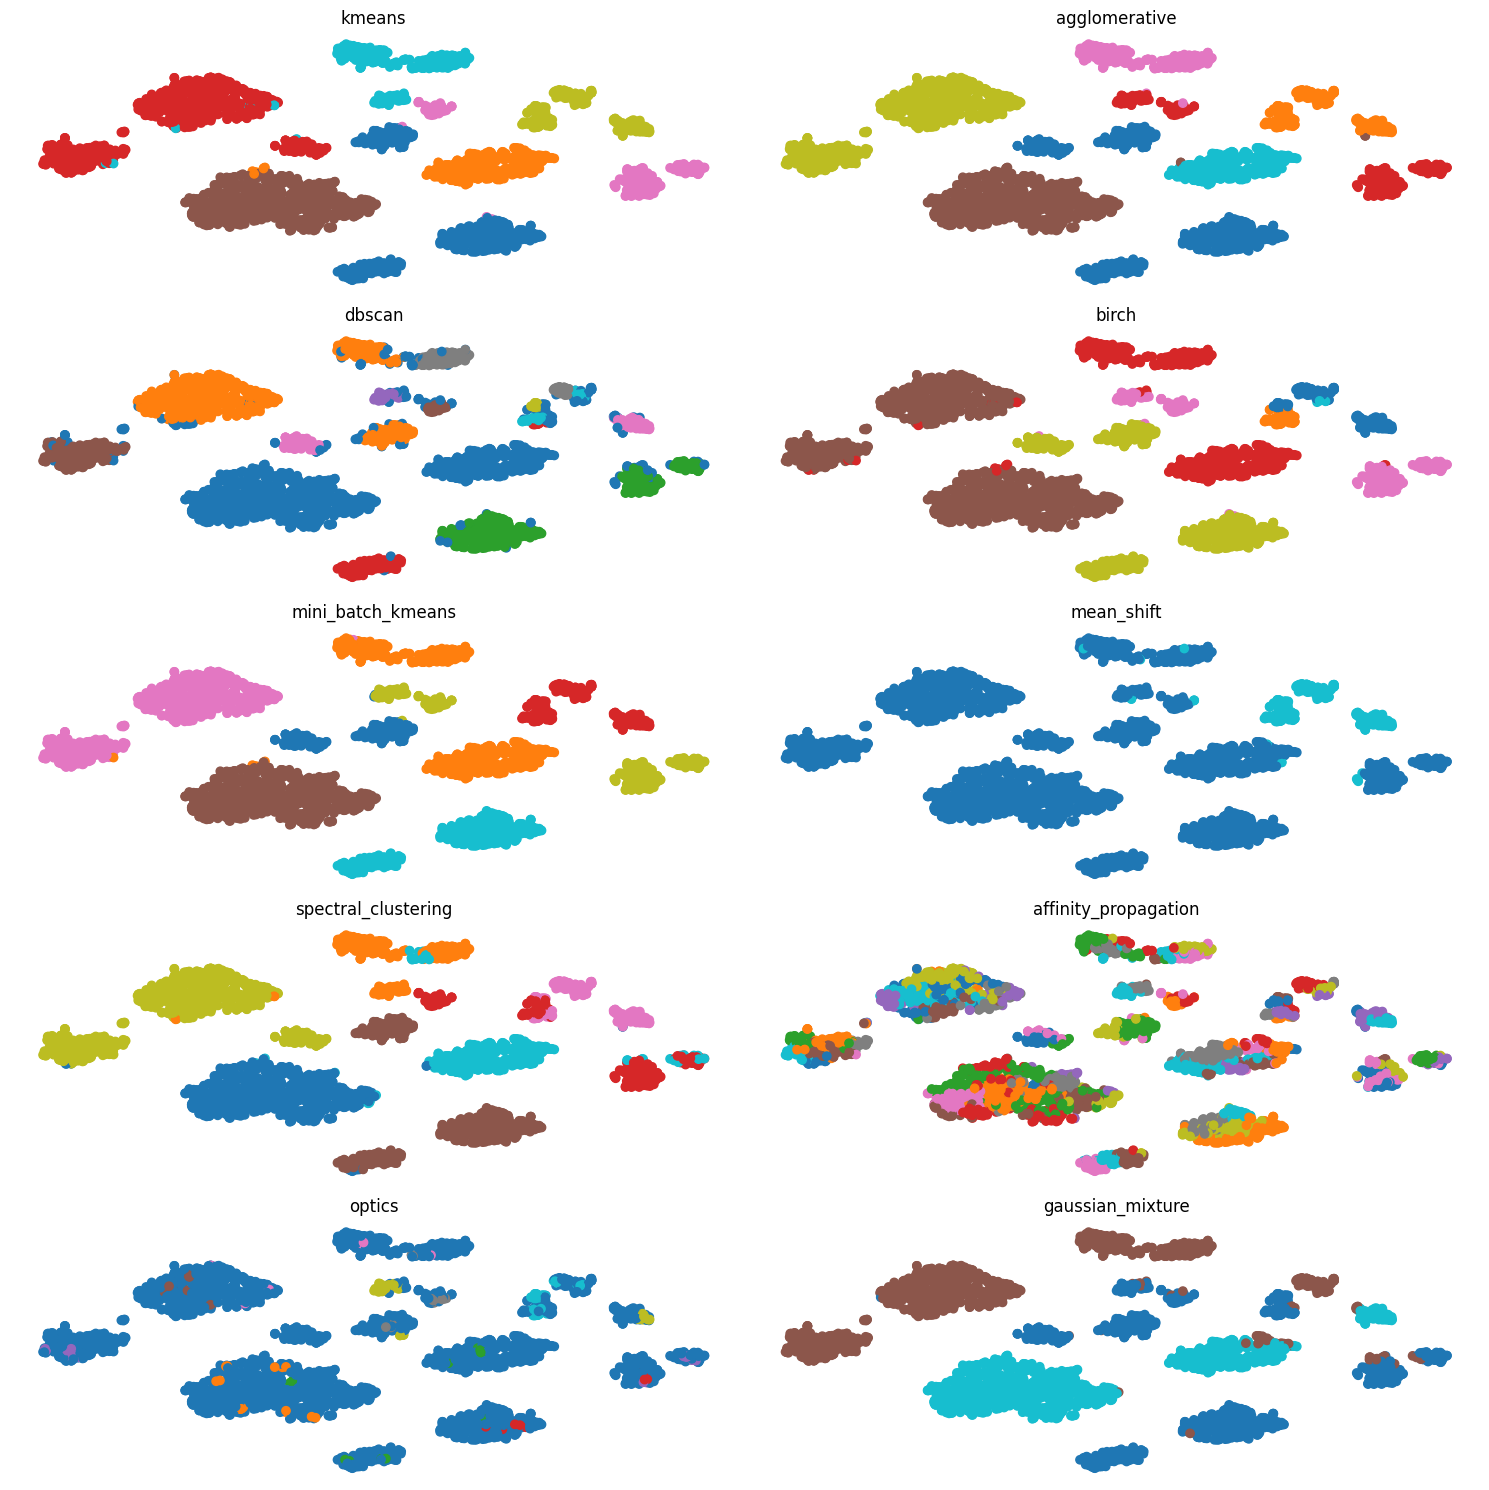

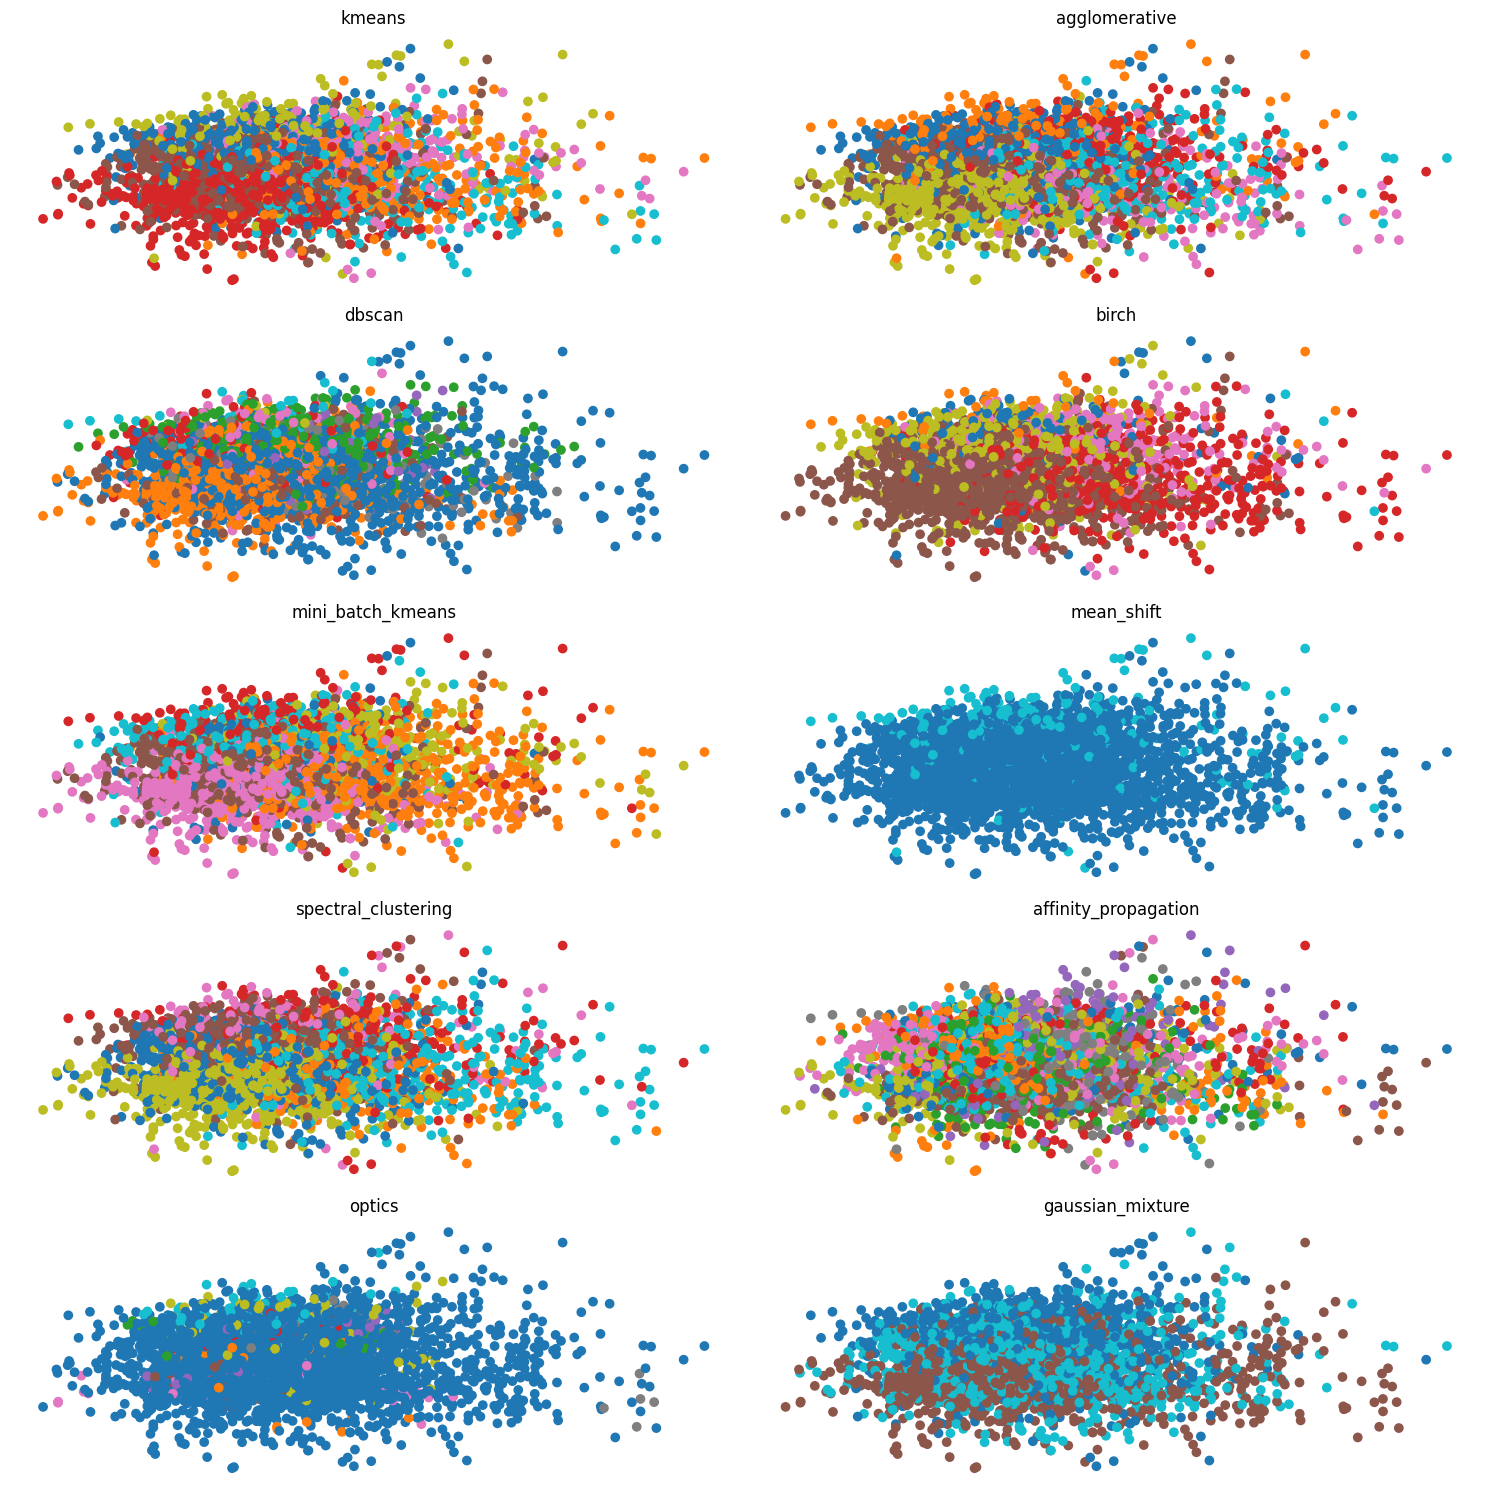

In [20]:
#wyżej sprawdzone tylko dla df4, teraz dla df3
#uwaga trzeba recznie w dbscanie w perform_clustering1 zmienić eps na lepsze, bo inaczej nie działa dobrze, dla df3 np były dobry 0.30 na oko eps
df3_results = pd.DataFrame()
perform_clustering1(df3, 7, df3_results,0.3)
perform_clustering2(df3, 7, df3_results)
scores = calculate_scores(df3_results)
print(scores)

# plot the results
plot_clusters(df3_results,df3_pca, df3_pca2, df3_tsne)

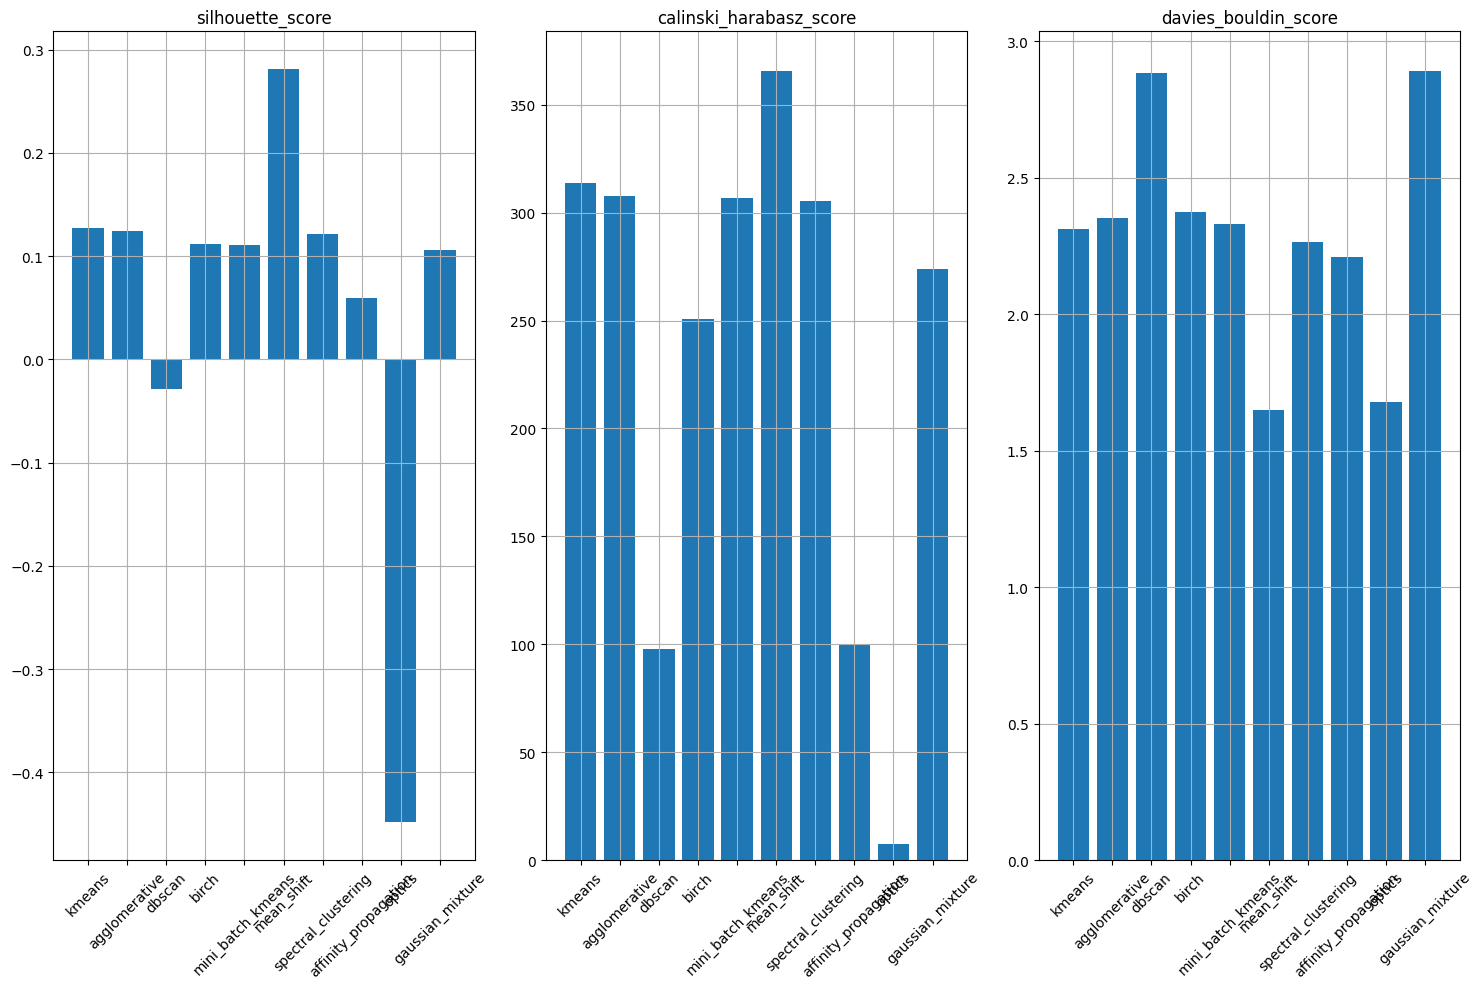

In [21]:
plot_scores(scores)

warto by było dla różnej liczby klastrów też sprawdzić, znaczy niektóre metody same wybierają ile, ale do niektórych się podaje ile (jako argument w perform_clustering)